# Hypothesis tests with confidence intervals

One of the most important uses of confidence intervals is for *hypothesis testing*.  In particular, we might want to test a hypothesis that the mean, median or some other summary value of a variable is equal to a particular value (or not).  To see how this might work, consider the `OKCupid` data set.  OKCupid is a social networking site where people provide details about themselves and their lives in an effort to find dates. Specifically, we have the details on a random sample of 1112 men from the site, and we will be interested in their average (median) *height*.

Let's load some useful packages, get the data and look at the **sample distribution** (this is not the *sampling distribution*!) of heights. We will put the *median* height on in red, and *mean* height in black.

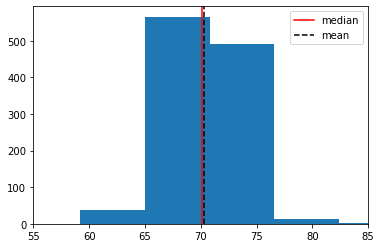

median: 70.07 inches
mean: 70.25131294964034 inches


In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

okc = pd.read_csv('data/okcupid_data_men.csv')
heights = okc["height"]
plt.hist(heights, bins=10)
plt.xlim(55,85)

plt.axvline(np.median(heights), color='r', linestyle='-', label="median") 
plt.axvline(np.mean(heights), color="black", linestyle="--", label="mean")
plt.legend()
plt.show()


print("median:",np.median(heights),"inches")
print("mean:",np.mean(heights),"inches")

The median man in our sample is just over 70 inches (5'10", 178cm) tall.  Notice that now, in contrast to our NYC salary example, we do not have the *population* median. Let's repeat our bootstrapping procedure from above to construct a sampling distribution and a 95\% confidence interval. We will start with the same core function, that resamples (bootstraps) rows to build up a set of medians.

In [2]:
def bootstrap_median(original_sample, label, replications):
    """Returns an array of bootstrapped sample medians:
    original_sample: dataframe containing the original sample
    label: name of column containing the variable
    replications: number of bootstrap samples
    """
    just_one_column = original_sample[[label]]
    medians = ([])
    for i in np.arange(replications):
        bootstrap_sample = just_one_column.sample(frac=1, replace=True)
        resampled_median = np.percentile(bootstrap_sample.iloc[:, 0], 50)
        medians = np.append(medians, resampled_median)
        
    return medians

Then we will need a function to take those bootstrapped medians, and return the 95\% confidence interval from them.

In [3]:
def make_conf_ends(the_medians, conf=95):
    lower = (100-conf)/2
    upper = 100- ((100-conf)/2)
    left = np.percentile(the_medians, lower)
    right = np.percentile(the_medians, upper)
    return(left,right,conf)

Now we will call the functions: first the core bootstrapping part (5000 replications), and then the part that makes the interval. Finally we print what we need.

In [4]:
bbs = bootstrap_median(okc, "height", 5000)
intervals = make_conf_ends(bbs,conf=95)
print("The",intervals[2],"% CI is (" ,intervals[0],  ","  ,intervals[1], ")"  )

The 95 % CI is ( 69.99 , 70.16 )


This confidence interval should be something like $(69.99 \mbox{ inches}, 70.16 \mbox{ inches} )$. Actually, there is nothing unique about bootstrapping that applies only to the *median*---as we will now see.

### Bootstrapping the Mean

We can bootstrap the mean too. If you don't know what that average is, we will return to it momentarily.  Our point here is just to show that we can apply our methods in more or less the same way as we have done for the median. That said, one thing to note is that the median is **robust** relative to the mean, which means that the median is not very responsive to *outliers* (very big or very small values in the tails of the sample).  The consequence above was that the median did not vary much as we resampled.  We expect the mean to vary more. 

We will set up the code in almost *exactly* the same way as before, except we will take the *mean* not the median.  So:

In [5]:
def bootstrap_mean(original_sample, label, replications):
    """Returns an array of bootstrapped sample means:
    original_sample: dataframe containing the original sample
    label: name of column containing the variable
    replications: number of bootstrap samples
    """
    just_one_column = original_sample[[label]]
    means = ([])
    for i in np.arange(replications):
        bootstrap_sample = just_one_column.sample(frac=1, replace=True)
        resampled_mean = np.mean(bootstrap_sample.iloc[:, 0])
        means = np.append(means, resampled_mean)
        
    return means

bms = bootstrap_mean(okc, "height", 5000)
intervalsm = make_conf_ends(bms, conf= 95)

print("The",intervalsm[2],"% CI is (" ,intervalsm[0],  ","  ,intervalsm[1], ")"  )

The 95 % CI is ( 70.07330440647495 , 70.43942491007199 )


This 95\% confidence interval should be something like $(70.06 \mbox{ inches}, 70.43 \mbox{ inches} )$, which is a little wider than the one for the median. We can compare the bootstrapped sampling distribution for the median and mean, respectively, to see this difference. Here's the sampling distribution for the median:

:::{figure-md} height_medians_sampd
<img src="figures/height_medians_sampd.png" alt="height_medians_sampd" class="bg-white mb-1" width="200px">

Sampling distribution for the median
:::

Here's the one for the mean:

:::{figure-md} height_means_sampd
<img src="figures/height_means_sampd.png" alt="height_means_sampd" class="bg-white mb-1" width="200px">

Sampling distribution for the mean
:::

### Bootstrapping Proportions
As suggested above, we can bootstrap all sorts of summaries and features of our data.  As a final example here we will use the bootstrap to provide a confidence interval on the number *proportion* of men in our sample who describe their `body_type` as `athletic`.  We won't belabor things too much; just note that we can run our code in a way almost identical to the above, but for a proportion.  This is simply 

$$
\frac{\mbox{number of units in the resample responding a particular way}}{\mbox{number of units in the resample}}
$$

where the particular response of interest is `athletic`.  Just to show that we can ask for any confidence level of interest, we will specify the 80\% here.

In [6]:
def bootstrap_proportion(original_sample, variable ,val, replications):
    
    """Returns an array of bootstrapped sample proportions:
    original_sample: df containing the original sample
    variable: variable of interest
    val: particular value of variable of interest
    replications: number of bootstrap samples
    """
    
    just_one_column = original_sample[variable]
    proportions = ([])
    for i in np.arange(replications):
        bootstrap_sample = just_one_column.sample(frac=1, replace=True)
        resampled_proportion = np.sum(bootstrap_sample==val)/len(bootstrap_sample)
        proportions = np.append(proportions, resampled_proportion)
        
    return proportions

bp = bootstrap_proportion(okc, "body_type" , "athletic", 5000)
intervalsp = make_conf_ends(bp, conf= 80)

print("The",intervalsp[2],"% CI is (" ,intervalsp[0],  ","  ,intervalsp[1], ")"  )

The 80 % CI is ( 0.24100719424460432 , 0.27428057553956836 )


## Testing Hypotheses with Confidence Intervals

We have established that

> The $p\%$ confidence interval gives us a set of numbers: if we follow our procedure many, many times, $p$ times out of 100 the interval will capture the true, population value of the parameter we care about.

This useful if we just need an (interval) estimate of the population parameter.  But it confidence intervals allow us to do more than that.  They also allow us to *test hypotheses* in a way similar to our efforts with $p$-values earlier.

Recall that the mean height of the men from the dating site was $70.25$ inches.  Via the [CDC website](https://www.cdc.gov/nchs/fastats/body-measurements.htm) we can look up the US population figure: it is $69$ inches for men.

Let's set up a *hypothesis test*:
- our *null* hypothesis is that the men on OKCupid do not differ, on average, from the US population as a whole.  Any difference we saw is just due to random sampling error.
- our *alternative* hypothesis it that the men on OKCupid do differ.

We need to ask whether 69 inches is a 'plausible' value of the average height of an OKCupid man.  If it is plausible, then we fail to reject the null.  If it is implausible, we reject the null and claim there is a statistically significant difference.

The particular way we will do this is via the confidence interval.  If the 95\% confidence interval of the mean includes 69, we deem 69 a plausible average value, and we fail to reject the null.  In this case, the 95\% confidence interval was $(70.06 \mbox{ inches}, 70.44 \mbox{ inches} )$.  This does *not* include 69, and we can therefore reject the null hypothesis.  In fact, we can reject the null at the 5\% level.  And this is completely general: 

> the $p$-percent confidence interval corresponds to $100-p$ level of a test.

By extension then: if we have a 99% confidence interval, we can reject the null at the 1%
level if it doesn't contain the claimed value.  For our OKCupid men's heights, the 99% confidence interval on the mean is $(70.01 \mbox{inches}, 70.49 \mbox{inches})$ so, again, we reject the null of no difference (this time at the 0.01 level). 

One final observation here is that using confidence intervals in this way is equivalent to doing a *two-tailed* test: our alternative hypothesis in this case was of a "difference", not a direction.

## Working with Bootstraps
In this part of the chapter, we have relied on bootstrap sampling to form confidence intervals.  In general, this method works well, but it is worth just noting some caveats about performance for when you come to use it in your own studies.

First, bootstrapping works well when the sample you have is *large* and *random*. Exactly *how* large is debatable, but we need the logic of the *Law of Large Numbers* to make sure our sample isn't too far, on average, from the nature of our population.

Second, bootstrapping can be expensive.  Here we did, say, 5000 replications.  This was fast enough, but generally as the number of replications increases our simulated estimate of the quantity of interest (here, the confidence interval) becomes *more accurate*.  In certain problems where it is very important to get the interval correct---say in medical dosing problems---we might want to run 10000 or 10000 resamples.  That number of simulations could be time consuming, depending on the problem at hand.

Third, bootstrapping works best when the "true" sampling distribution is approximately normally distributed.  We will cover the normal distribution later in this chapter, but the point is that it should be roughly symmetric and single peaked.  

Fourth, and related, bootstrapping works well when we are trying to characterize the behavior of "central" statistics that are near the middle of the distribution---like medians, or means.  It can fail to resample properly when what we are trying to provide a confidence interval for is an extreme value, like the minimum or maximum.  This is basically because, in a given sample, it may not be able to find enough of these very large (or very small values) to build up a distribution from.  
